In [37]:
import requests # 이제부터 이것만쓸것
from bs4 import BeautifulSoup

In [42]:
headers = {
    "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36" #header 정보가없으면 bot 이라고 걸러내는경우가있엇음
}
params = {
    "q":"한글"
}

url = "https://www.google.co.kr/search"
    
    #한글로쓴것을 바이너리로바뀌어서 get 에 쿼리로 들어감. 
    

In [43]:
html = requests.get(url, params=params, headers=headers) 

In [16]:
#bs4 로 돔트리를 해석한다. 

In [44]:
headers = {
    "user-agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36"
}

params = {
    "q":"한글"
}

url = "https://www.google.co.kr/search"
# https://www.google.co.kr/search?
#     q=%EC%B6%94%EC%8B%A0%EC%88%98
#     &oq=%EC%B6%94%EC%8B%A0%EC%88%98
#     &aqs=chrome..69i57j0j69i60j69i61l2j0.10751j0j7
#     &sourceid=chrome
#     &ie=UTF-8

In [45]:
html = requests.get(url, params=params, headers=headers) 
#해당 헤더, 파라미터와 url에 대한 request

In [46]:
html.encoding

'UTF-8'

In [47]:
dom = BeautifulSoup(html.text,"lxml")

In [48]:
type(dom) #이게 bs4 최상위에 있는 객체노드

bs4.BeautifulSoup

[<a href="/search?q=%ED%95%9C%EA%B8%80&amp;gbv=1&amp;sei=QUZNW_DVE9Tp-QaV-oOgCA">여기</a>,
 <a aria-expanded="false" class="gb_b gb_dc" data-ogsr-alt="" href="https://www.google.co.kr/intl/ko/options/" role="button" tabindex="0" title="Google 앱"></a>,
 <a class="gb_5f gb_Aa gb_Eb" href="https://accounts.google.com/ServiceLogin?hl=ko&amp;passive=true&amp;continue=https://www.google.co.kr/search%3Fq%3D%25ED%2595%259C%25EA%25B8%2580" id="gb_70" target="_top">로그인</a>,
 <a data-hveid="3" href="https://www.google.co.kr/webhp?hl=ko&amp;sa=X&amp;ved=0ahUKEwiw-ojq_aTcAhXUdN4KHRX9AIQQPAgD" id="logo" title="Google 홈페이지로 이동"><img alt="Google" height="44" src="/images/branding/googlelogo/2x/googlelogo_color_120x44dp.png" width="120"/></a>,
 <a href="//support.google.com/websearch/answer/186645?hl=ko">자세히 알아보기</a>,
 <a class="duf3 aciXEb" data-async-trigger="duf3-46" data-ved="0ahUKEwiw-ojq_aTcAhXUdN4KHRX9AIQQtw8IBQ" href="#" id="sbfblt" jsaction="async.u">부적절한 예상 검색어 신고</a>,
 <a class="q qs" href="/s
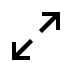

In [49]:
dom.select("a")

In [50]:
dom.select("div.rc") # 그냥 rc 로 해도되는데 div 가 rc 인걸로한정지음

[<div class="rc"><h3 class="r"><a href="http://www.hancom.com/downLoad.downPU.do" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=http://www.hancom.com/downLoad.downPU.do&amp;ved=0ahUKEwiw-ojq_aTcAhXUdN4KHRX9AIQQFgglMAA">다운로드 : 한글과컴퓨터 - Hancom</a></h3><div class="s"><div><div class="f hJND5c TbwUpd" style="white-space:nowrap"><cite class="iUh30">www.hancom.com/downLoad.downPU.do</cite><div class="action-menu ab_ctl"><a aria-expanded="false" aria-haspopup="true" aria-label="검색결과 옵션" class="GHDvEf ab_button" data-ved="0ahUKEwiw-ojq_aTcAhXUdN4KHRX9AIQQ7B0IJjAA" href="#" id="am-b0" jsaction="m.tdd;keydown:m.hbke;keypress:m.mskpe" role="button"><span class="mn-dwn-arw"></span></a><div class="action-menu-panel ab_dropdown" data-ved="0ahUKEwiw-ojq_aTcAhXUdN4KHRX9AIQQqR8IJzAA" jsaction="keydown:m.hdke;mouseover:m.hdhne;mouseout:m.hdhue" role="menu" tabindex="-1"><ol><li class="action-menu-item ab_dropdownitem" role="menuitem"><a class="fl" href="http://webcache.googleusercontent.com/search?q=

In [52]:
aList = dom.select("div.rc > h3.r > a")

In [57]:
for row in aList:
    print(row["href"])

http://www.hancom.com/downLoad.downPU.do
https://www.hancom.com/product/productWindowsMain.do
https://namu.wiki/w/%ED%95%9C%EA%B8%80
https://ko.wikipedia.org/wiki/%ED%95%9C%EA%B8%80
https://ko.wikibooks.org/wiki/%ED%95%9C%EA%B5%AD%EC%96%B4_%EC%9E%85%EB%AC%B8/%ED%95%9C%EA%B8%80_%EC%9E%90%EB%AA%A8
https://www.korean.go.kr/hangeul/principle/001.html
https://www1.president.go.kr/petitions/154276
http://www.kocca.kr/cop/bbs/view/B0000137/1833364.do?menuNo=200827&noticevent=Y
https://www.microsoft.com/ko-kr/download/details.aspx?id=36772


In [107]:
def getUrl(url,params=None,select = "a", num_retries=2): # header 정보는 위에서 설정했으니까 필요가없을거같고.
    html = requests.get(url, params=params, headers=headers) 
    
    #responce 객체인 html 에 는 status_code 가 있다 . 에러 코드.
    if 500<=html.status_code<600 and num_retries>0:
        print(html.status_code,html.reason)
        return getURl(url,params,num_retries-1)
    
    dom = BeautifulSoup(html.text,"lxml")
    links = dom.select(select)
    return [link["href"]for link in links if link.has_attr("href") == True] # 링크에 href 속성이있으면  href 속성을 가지고 리스트를 만들어서 return


In [108]:
links = getUrl(url,params)

In [109]:
links

['/search?q=%ED%95%9C%EA%B8%80&gbv=1&sei=MlBNW-zBHZGEoATf_rvABg',
 'https://www.google.co.kr/intl/ko/options/',
 'https://accounts.google.com/ServiceLogin?hl=ko&passive=true&continue=https://www.google.co.kr/search%3Fq%3D%25ED%2595%259C%25EA%25B8%2580',
 'https://www.google.co.kr/webhp?hl=ko&sa=X&ved=0ahUKEwjsotmnh6XcAhURAogKHV__DmgQPAgD',
 '//support.google.com/websearch/answer/186645?hl=ko',
 '#',
 '/search?q=%ED%95%9C%EA%B8%80&source=lnms&tbm=isch&sa=X&ved=0ahUKEwjsotmnh6XcAhURAogKHV__DmgQ_AUICigB',
 '/search?q=%ED%95%9C%EA%B8%80&source=lnms&tbm=vid&sa=X&ved=0ahUKEwjsotmnh6XcAhURAogKHV__DmgQ_AUICygC',
 '/search?q=%ED%95%9C%EA%B8%80&source=lnms&tbm=nws&sa=X&ved=0ahUKEwjsotmnh6XcAhURAogKHV__DmgQ_AUIDCgD',
 '/search?q=%ED%95%9C%EA%B8%80&source=lnms&tbm=bks&sa=X&ved=0ahUKEwjsotmnh6XcAhURAogKHV__DmgQ_AUIDSgE',
 'https://maps.google.co.kr/maps?q=%ED%95%9C%EA%B8%80&um=1&ie=UTF-8&sa=X&ved=0ahUKEwjsotmnh6XcAhURAogKHV__DmgQ_AUIDygA',
 '/search?q=%ED%95%9C%EA%B8%80&source=lnms&tbm=fin&sa=X&ved

In [110]:
#    links = dom.select("div.rc > h3.r > a") 구글에서 해당되니까 다른사이트는 , 다른 방식으로 가져와야한다 .
links = getUrl(url,params)

In [ ]:
def getUrl(url,params=None,num_retries=2): # header 정보는 위에서 설정했으니까 필요가없을거같고.
    html = requests.get(url, params=params, headers=headers) 
    
    #responce 객체인 html 에 는 status_code 가 있다 . 에러 코드.
    if 500<=html.status_code<600 and num_retries>0:
        print(html.status_code,html.reason)
        return getURl(url,params,num_retries-1)
    
    dom = BeautifulSoup(html.text,"lxml")
    links = dom.select("div.rc > h3.r > a")
    return [link["href"]for link in links]


In [113]:
seed = "https://www.google.co.kr/search"
select = "div.rc > h3.r > a"
queue = [seed] # 리스트는 큐처럼 쓸수있다.

In [119]:
while queue:
    url = queue.pop()
    queue.extend(getUrl(url,params,select)) #리스트 정보를 큐에 덮어쓴다 , append 로하면리스트가 리스트로 붙어서 이중리스트가 되니까, extend 로 함.
    print(url,len(queue))
    select = "a"
    break

https://www.microsoft.com/trademarks 408


In [172]:
def getUrl(url,params=None,select = "a", num_retries=2): # header 정보는 위에서 설정했으니까 필요가없을거같고.
    html = requests.get(url, params=params, headers=headers) 
    
    #responce 객체인 html 에 는 status_code 가 있다 . 에러 코드.
    if 500<=html.status_code<600 and num_retries>0:
        print(html.status_code,html.reason)
        return getURl(url,params,num_retries-1)
    
    dom = BeautifulSoup(html.text,"html.parser")
    links = dom.select(select)
    return [link["href"]for link in links if link.has_attr("href") == True] # 링크에 href 속성이있으면  href 속성을 가지고 리스트를 만들어서 return


--------------

In [164]:
seed = "http://www.ppomppu.co.kr/zboard/zboard.php?id=freeboard"
queue = getUrl(seed,params)

In [165]:
queue

[]

위의 코드는 인코딩을 해서 다깨져버려서 태그를 못가져온것 ,그래서 아래에서 encodinf false 를 준다.

In [134]:
seed = "http://www.ppomppu.co.kr/zboard/zboard.php?id=freeboard"
select = "td.list_vspace > a"

queue = getUrl(seed,params,select)
result = list()

td.list_vspace > a


In [135]:
while queue:
    url = queue.pop()
    result.extend(getUrl(url,params))
    print(url,len(result))

무엇때매 못가져왔나 확인해보기 .

In [136]:
html = requests.get(seed, params=params, headers=headers) 

In [137]:
html.status_code

200

In [138]:
html.text

'\x1f�\x08\x00\x00\x00\x00\x00\x00\x03�}�\x7f培�偵淚s��\tR��F|�-��M�푠7�m琫�u訖\x07$!\x11\x16\x080\x00(YM|�\x177N�N\x1a��(��\x1e\x04�\x07����47��g];n恩�\\om�u�s�\x19\x00$H�\x14�\x07謚V"�\x04��s沇���93\x03�\x7f葉�\x0f\x1c嚆\x17� Q5&�\x17~懸3O\x1f �悳�Y�\x01륜����\x7f昏��>C�.\x0f9(끼짬�$��璧�s\x0ca˚\x1a\x1fr�\'&&\\\x13�.I\x1eu\x1f���(窒ba膝S��tE�\x08\x13h��w�\x1f���?1Ne\trsr/%�q?s@\x12UNT�\x07\'�\x1cC찮7?�rGU7\x16\x1d&�(++�喩\x12a���\x10w=6/�e>^��\x11v�U妖�x��\x02W�EXQj��7�O\x1fu\x1e�bqV�C�듀�O篇�(���D6폰\x196�F%�B癡\x0b�?戶\x0b?%\x07�wU�F8]k값�~�7�\x1fV\x10�q�\x13�\x1cQ,T@螺��\x01㎡�p��&���Z\x08\'��\x1a�G�q>�9��.����оT짭쟬�3�H\x0c��\x121瑜�쪼�;\x0b充OrJ\x17QYy�S�\x11\x0e�a2\x12�M폅�博繞zQ�睡\x14�du碌H�C|�\x1d�\x1a穹w�8X7�p�%��利���\x07� \x1b�\x07}\x1eo�㎸鯉���TD5��\r\x17D\x13T�Q/�智�\x05�\x02q\x12茨�v辰톡돠~�~\x03拷_瑄1\x12��\x11올�m\x048)�QI\x1a\x1586�+�`\x0c\x1d��\x116�\x0b���$Uz�E�\x17\x0e"s�傘�w)Q�S\x1dD\x05\x1f�;L�r\x04�]t\x19H��h\x19�錄�T\t��m蓆��t�\x1a�~것�㏖身\x0e琬�k�i��Bⓖ\x1d�G휀O\x1c�u���R�j\x0f\x1c遂\x08?rXw0츠u���6iS[�\x1a暘c!�h�\x03�莊�

다 깨져있네 . 그래서 못가져온것 . 

In [139]:
html.encoding

'euc-kr'

In [140]:
type(html.content)

bytes

decode : byte - >Str 

In [141]:
html.conent.decode("euc-kr")

AttributeError: 'Response' object has no attribute 'conent'

근데 안된다. 그래서 헤더가 필요하다 .

In [173]:
headers = {
    "user-agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36",
    "accept-encoding": "false" 
}
#인코딩을 니가하지말고 내가하겠다, 즉 순수 바이트만 달라. 라는옵션추가함.

In [174]:
seed = "http://www.ppomppu.co.kr/zboard/zboard.php?id=freeboard"

getUrl(seed,params)



['http://www.ppomppu.co.kr/zboard/zboard.php?id=ppomppu',
 'http://www.ppomppu.co.kr/zboard/zboard.php?id=event',
 'http://www.ppomppu.co.kr/zboard/zboard.php?id=buy',
 'http://www.ppomppu.co.kr/zboard/zboard.php?id=help',
 'http://www.ppomppu.co.kr/zboard/zboard.php?id=freeboard',
 'http://www.ppomppu.co.kr/zboard/zboard.php?id=etc_info',
 'http://www.ppomppu.co.kr/zboard/zboard.php?id=free_picture',
 'http://www.ppomppu.co.kr/zboard/zboard.php?id=news2',
 'http://www.ppomppu.co.kr/zboard/zboard.php?id=review',
 'http://www.ppomppu.co.kr/recent_main_article.php?type=market',
 'http://www.ppomppu.co.kr/myinfo/env.php?cmd=env',
 'http://www.ppomppu.co.kr/myinfo/member_bookmark.php',
 'http://www.ppomppu.co.kr/index.php',
 '/zboard/zboard.php?id=freeboard',
 'http://www.ppomppu.co.kr/zboard/zboard.php?id=ppomppu',
 'http://www.ppomppu.co.kr/zboard/zboard.php?id=ppomppu',
 'http://www.ppomppu.co.kr/zboard/zboard.php?id=ppomppu2',
 'http://www.ppomppu.co.kr/zboard/zboard.php?id=ppomppu4',


뽐뿌는 표준이 안되어있고 . c 를가지고 lxml 로 파싱을하는데 닫고열고가 정확히 중요해야한다 그래서 lxml 로 불러오기가 힘들다 . 따라서 파서를 바꿔주어야한다.

In [175]:
select = "td.list_vspace > a"
queue = getUrl(seed,params,select)
queue

['view.php?id=regulation&page=1&divpage=202&no=6',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951712',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951711',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951710',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951709',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951708',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951707',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951706',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951705',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951704',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951703',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951702',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951701',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951700',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951699',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951698',
 'view.php?id=freeboard&page=1&divpage=1111&no=5951697',
 'view.php?id=freeboard&page=1&divpag